In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

In [4]:
# name of the sample granule
granule_name = "/home/zhe2/data/MyProjects/PACE_redSIF_PACE/sample/sample_granule_20250808T204353_new_chl.nc"
# open the granule using xarray
ds = xr.open_dataset(granule_name)
# get nflh
nflh = ds['nflh']
lat  = ds['latitude']
lon  = ds['longitude']
# mask
nflh_masked = np.ma.masked_invalid(nflh)

vmin: -3.504753112792969e-05, vmax: 0.18169498443603516


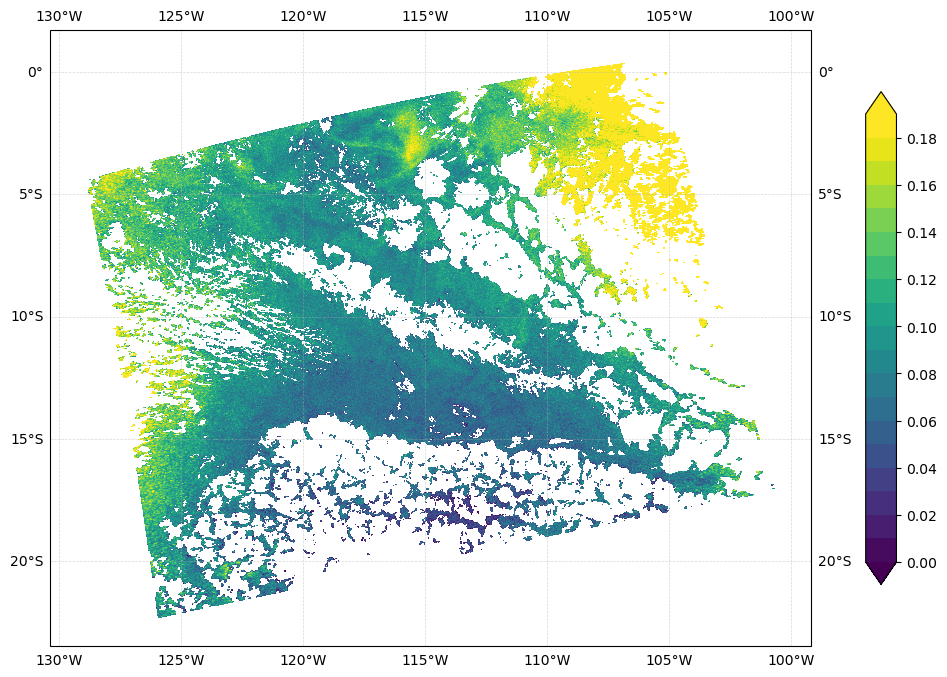

In [17]:
# draw the map
fig = plt.figure(figsize=(14, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black', linewidth=0.5)
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.3, alpha=0.5)
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, linestyle='--')

vmin = np.nanpercentile(nflh_masked.data, 2)
vmax = np.nanpercentile(nflh_masked.data, 98)
print(f"vmin: {vmin}, vmax: {vmax}")
levels = np.arange(0, 0.20, 0.01)

contour = ax.contourf(lon, lat, nflh_masked,
                        levels=levels,
                        transform=ccrs.PlateCarree(),
                        cmap='viridis',
                        extend='both',
                        vmin=vmin,
                        vmax=vmax)

# add colorbar
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.05, aspect=16, shrink=0.8)